In [497]:
!pip install researchpy

In [498]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean, stdev

sns.set()
plt.set_cmap('tab10')

<Figure size 432x288 with 0 Axes>

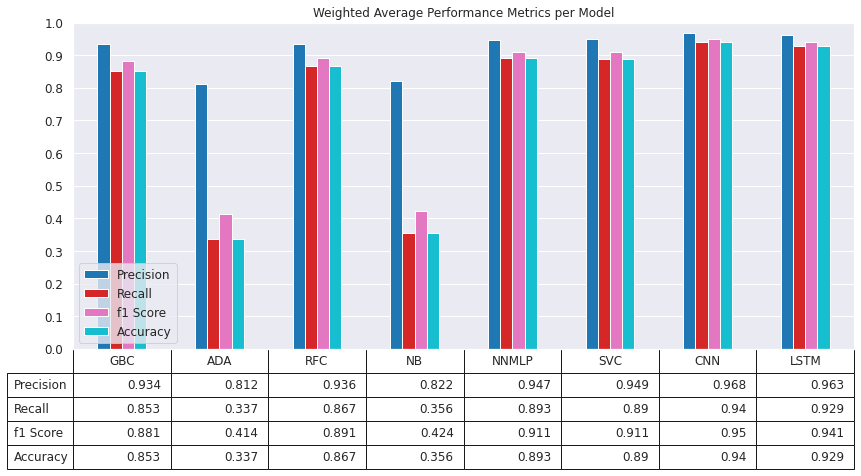

In [499]:
precision = [0.934,0.812,0.936,0.822,0.947,0.949,0.968,0.963]
recall =    [0.853,0.337,0.867,0.356,0.893,0.890,0.940,0.929]
f1_score =  [0.881,0.414,0.891,0.424,0.911,0.911,0.950,0.941]
accuracy =  [0.853,0.337,0.867,0.356,0.893,0.890,0.940,0.929]
index = ['GBC','ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_res = pd.DataFrame({'Precision':precision,
                   'Recall':recall,
                   'f1 Score':f1_score,
                   'Accuracy':accuracy
                  },
                  index=index)
ax = df_res.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            table=True,
            title=('Weighted Average Performance Metrics per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=3, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [500]:
#crossval scores copied here, takes too long to run everytime, using these scores for thesis results

ada_score=  {'fit_time':  [593.67027783, 590.14921999, 586.47153735, 587.08071232,
       586.55754781, 593.02368736], 'score_time':  [2.25231218, 2.23539925, 2.27471614, 2.23945904, 2.23752856,
       2.24986124], 'test_accuracy':  [0.74728627, 0.69285318, 0.72910229, 0.83226369, 0.81194042,
       0.82041835], 'test_prec_macro':  [0.30843925, 0.39413839, 0.35981792, 0.47842174, 0.29709635,
       0.40506096], 'test_rec_macro':  [0.25176287, 0.29945686, 0.34495462, 0.3346276 , 0.25696864,
       0.29889129], 'test_f1_macro':  [0.24122488, 0.32882251, 0.34045842, 0.36437765, 0.25527602,
       0.30791171]}
#--------------------------------------------------------------------------------------------------------
rfc_score=  {'fit_time':  [21.12967205, 21.32598662, 21.17011929, 21.23944426, 21.21314645,
       21.43212938], 'score_time':  [0.09104347, 0.08750677, 0.08953238, 0.0880754 , 0.08705878,
       0.08782387], 'test_accuracy':  [0.94509151, 0.93823786, 0.90991205, 0.89089613, 0.95028128,
       0.86340227], 'test_prec_macro':  [0.78842433, 0.81948987, 0.67234172, 0.8116754 , 0.9181734 ,
       0.69662641], 'test_rec_macro':  [0.62778733, 0.62810241, 0.59945773, 0.64743275, 0.74400987,
       0.53782036], 'test_f1_macro':  [0.65458453, 0.68352576, 0.61353741, 0.65380912, 0.78348763,
       0.52906008]}
#--------------------------------------------------------------------------------------------------------
NB_score=  {'fit_time':  [0.55873752, 0.431108  , 0.43778062, 0.43192697, 0.43958426,
       0.44945312], 'score_time':  [0.3978858 , 0.34606552, 0.35405922, 0.3445518 , 0.33985734,
       0.34500241], 'test_accuracy':  [0.31610015, 0.46165122, 0.37584185, 0.41284367, 0.35599398,
       0.36360035], 'test_prec_macro':  [0.25136811, 0.49146357, 0.40417654, 0.31786864, 0.34631924,
       0.26442785], 'test_rec_macro':  [0.49064974, 0.60794467, 0.47305506, 0.49418438, 0.59079385,
       0.32632389], 'test_f1_macro':  [0.22606596, 0.48192747, 0.35033118, 0.29124791, 0.33580627,
       0.14461332]}
#--------------------------------------------------------------------------------------------------------
NNMLP_score=  {'fit_time':  [165.98949575, 165.30507994, 167.49027371, 166.55398107,
       167.96410728, 168.56676769], 'score_time':  [0.16712236, 0.12616062, 0.13145828, 0.12851572, 0.12566209,
       0.12814641], 'test_accuracy':  [0.82838127, 0.91557721, 0.79807464, 0.66496316, 0.65581174,
       0.76959037], 'test_prec_macro':  [0.57106229, 0.80525225, 0.58937812, 0.7102489 , 0.66305254,
       0.66069001], 'test_rec_macro':  [0.75472598, 0.89537902, 0.70184704, 0.81166074, 0.84285553,
       0.63988648], 'test_f1_macro':  [0.61865565, 0.8313654 , 0.587824  , 0.67030656, 0.67160839,
       0.52240572]}
#--------------------------------------------------------------------------------------------------------
svc_score=  {'fit_time':  [642.30292201, 646.53838873, 575.00823545, 709.41671395,
       750.34017038, 744.55916381], 'score_time':  [ 94.51631951, 100.8772769 ,  92.34038115,  98.26870108,
       106.30826044, 108.08605218], 'test_accuracy':  [0.93677205, 0.96684098, 0.89549164, 0.77569131, 0.94180334,
       0.92690754], 'test_prec_macro':  [0.79586667, 0.90091636, 0.68223593, 0.74609379, 0.82913171,
       0.8356737 ], 'test_rec_macro':  [0.73396577, 0.8543839 , 0.74048629, 0.824423  , 0.91494934,
       0.77623234], 'test_f1_macro':  [0.73831965, 0.86526215, 0.70052789, 0.70673416, 0.84192144,
       0.73884909]}
#--------------------------------------------------------------------------------------------------------
cnn_score= {'fit_time':  [24.15, 24.15, 24.15, 24.15, 24.15 ,
       24.15], 'score_time':  [2.3 , 3.3, 2.3 , 3.3, 2.3 , 
       3.3,], 'test_accuracy':  [0.954, 0.967, 0.950, 0.946, 0.958,
       0.960], 'test_prec_macro':  [0.844, 0.879, 0.874, 0.803, 0.920,
       0.885], 'test_rec_macro':  [0.796, 0.824, 0.786, 0.830, 0.781,
       0.828], 'test_f1_macro':  [0.793, 0.827, 0.811, 0.793, 0.829,
       0.840]}

#--------------------------------------------------------------------------------------------------------
lstm_score= {'fit_time':  [42.97, 42.97, 41.97, 41.97, 42.97 ,
       41.97], 'score_time':  [20.25 , 20.24, 20.24, 20.24, 19.24,
       19.24], 'test_accuracy':  [0.863, 0.918 , 0.858 , 0.755, 0.927,
       0.815], 'test_prec_macro':  [0.704, 0.851, 0.613, 0.626, 0.769,
       0.556], 'test_rec_macro':  [0.690 , 0.823, 0.766, 0.743, 0.711,
       0.397], 'test_f1_macro':  [0.662, 0.794, 0.658, 0.633, 0.763,
       0.383]}

In [501]:
ada=[]
rfc=[]
nb=[]
nnmlp=[]
svc=[]
cnn=[]
lstm=[]

for st,vals in ada_score.items():
    ada.append((st,round(mean(vals),3),round(stdev(vals),3)))

for st,vals in rfc_score.items():
    rfc.append((st,round(mean(vals),3),round(stdev(vals),3)))

for st,vals in NB_score.items():
    nb.append((st,round(mean(vals),3),round(stdev(vals),3)))

for st,vals in NNMLP_score.items():
    nnmlp.append((st,round(mean(vals),3),round(stdev(vals),3)))

for st,vals in svc_score.items():
    svc.append((st,round(mean(vals),3),round(stdev(vals),3)))

for st,vals in cnn_score.items():
    cnn.append((st,round(mean(vals),3),round(stdev(vals),3)))

for st,vals in lstm_score.items():
    lstm.append((st,round(mean(vals),3),round(stdev(vals),3)))

In [502]:
ada

[('fit_time', 589.492, 3.284),
 ('score_time', 2.248, 0.015),
 ('test_accuracy', 0.772, 0.057),
 ('test_prec_macro', 0.374, 0.067),
 ('test_rec_macro', 0.298, 0.038),
 ('test_f1_macro', 0.306, 0.049)]

In [503]:
rfc

[('fit_time', 21.252, 0.111),
 ('score_time', 0.089, 0.001),
 ('test_accuracy', 0.916, 0.034),
 ('test_prec_macro', 0.784, 0.09),
 ('test_rec_macro', 0.631, 0.067),
 ('test_f1_macro', 0.653, 0.084)]

In [504]:
nb

[('fit_time', 0.458, 0.05),
 ('score_time', 0.355, 0.022),
 ('test_accuracy', 0.381, 0.05),
 ('test_prec_macro', 0.346, 0.09),
 ('test_rec_macro', 0.497, 0.101),
 ('test_f1_macro', 0.305, 0.115)]

In [505]:
nnmlp

[('fit_time', 166.978, 1.242),
 ('score_time', 0.135, 0.016),
 ('test_accuracy', 0.772, 0.099),
 ('test_prec_macro', 0.667, 0.085),
 ('test_rec_macro', 0.774, 0.094),
 ('test_f1_macro', 0.65, 0.105)]

In [506]:
svc

[('fit_time', 678.028, 68.588),
 ('score_time', 100.066, 6.287),
 ('test_accuracy', 0.907, 0.068),
 ('test_prec_macro', 0.798, 0.076),
 ('test_rec_macro', 0.807, 0.071),
 ('test_f1_macro', 0.765, 0.071)]

In [507]:
cnn

[('fit_time', 24.15, 0.0),
 ('score_time', 2.8, 0.548),
 ('test_accuracy', 0.956, 0.007),
 ('test_prec_macro', 0.868, 0.04),
 ('test_rec_macro', 0.807, 0.022),
 ('test_f1_macro', 0.816, 0.02)]

In [508]:
lstm

[('fit_time', 42.47, 0.548),
 ('score_time', 19.908, 0.518),
 ('test_accuracy', 0.856, 0.065),
 ('test_prec_macro', 0.686, 0.11),
 ('test_rec_macro', 0.688, 0.15),
 ('test_f1_macro', 0.649, 0.145)]

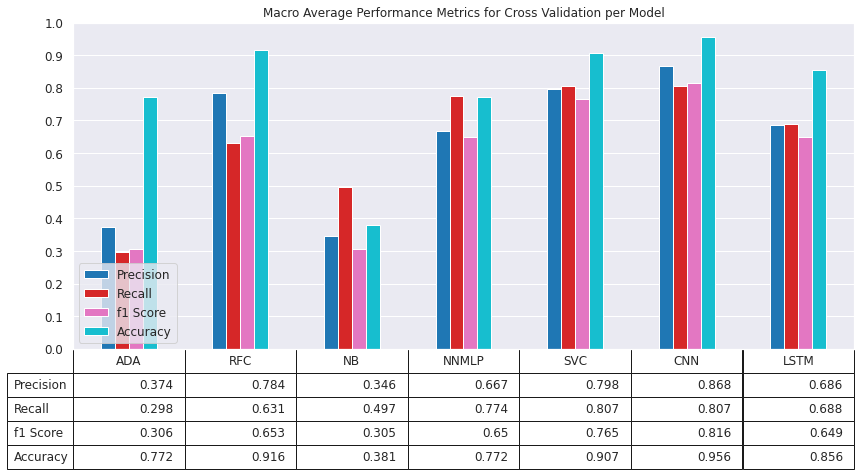

In [509]:
cv_precision = [ada[3][1],rfc[3][1],nb[3][1],nnmlp[3][1],svc[3][1],cnn[3][1],lstm[3][1]]
cv_recall =    [ada[4][1],rfc[4][1],nb[4][1],nnmlp[4][1],svc[4][1],cnn[4][1],lstm[4][1]]
cv_f1_score =  [ada[5][1],rfc[5][1],nb[5][1],nnmlp[5][1],svc[5][1],cnn[5][1],lstm[5][1]]
cv_accuracy =  [ada[2][1],rfc[2][1],nb[2][1],nnmlp[2][1],svc[2][1],cnn[2][1],lstm[2][1]]
index = ['ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_cv = pd.DataFrame({'Precision':cv_precision,
                   'Recall':cv_recall,
                   'f1 Score':cv_f1_score,
                   'Accuracy':cv_accuracy
                  },
                  index=index)
ax = df_cv.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            table=True,
            title=('Macro Average Performance Metrics for Cross Validation per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=3, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [510]:
import researchpy as rp
rp.summary_cont(df_cv)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Precision,7.0,0.6461,0.2071,0.0783,0.4546,0.8377
1,Recall,7.0,0.6431,0.1886,0.0713,0.4687,0.8176
2,f1 Score,7.0,0.5920,0.2060,0.0779,0.4015,0.7825
3,Accuracy,7.0,0.7943,0.1955,0.0739,0.6135,0.9751


In [511]:
stack_df = df_cv.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'models',
                                    'level_1': 'metric',
                                    0:'score'},)
display(stack_df)

,models,metric,score
0,ADA,Precision,0.374
1,ADA,Recall,0.298
2,ADA,f1 Score,0.306
3,ADA,Accuracy,0.772
4,RFC,Precision,0.784
5,RFC,Recall,0.631
6,RFC,f1 Score,0.653
7,RFC,Accuracy,0.916
8,NB,Precision,0.346
9,NB,Recall,0.497


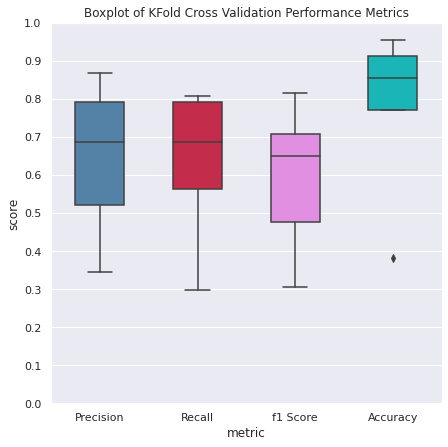

In [512]:
plt.figure(figsize=(7,7))
mypal=('#4682B4','#DC143C','#EE82EE','#00CED1')
ax = sns.boxplot(y=stack_df["score"], x=stack_df["metric"],width=0.5, palette=mypal)
ax.set_title('Boxplot of KFold Cross Validation Performance Metrics')
ax.set_ylim(0.0,1.0)
ax.set_yticks(ticks=ticks,minor=False)

In [513]:
import numpy as np
import scipy.stats as stats
# to check
# Confidence interval
confidence_level = 0.95
# If juste samples (not mean) the dof is 
mean_list, std_list, ci_list = [], [], []
for col_name  in df_cv:
    col_values = df_cv[col_name].values
    sample_size = len(col_values)
    degrees_freedom = sample_size - 1
    sample_mean = np.mean(col_values)
    # Standard error of the mean (SEM) = sigma / sqrt(n)
    sample_standard_error = stats.sem(col_values)
    print('sample_standard_error s^2=', sample_standard_error,
         'or s/np.sqrt(n_t)', np.std(col_values)/np.sqrt(sample_size),  np.std(col_values))
    confidence_interval = stats.t.interval(alpha=confidence_level,
                                           df=degrees_freedom,
                                           loc=sample_mean,
                                           scale=sample_standard_error)
    std_list.append(sample_standard_error)
    ci_list.append(confidence_interval)
    mean_list.append(sample_mean)
    
CI_df = pd.DataFrame([df_cv.columns.values, mean_list, std_list,  ci_list]).transpose()
CI_df.columns = ['metric',
                 'mean',
                 'std error',
                 'CI']
CI_df.loc[:,'CI'] =  CI_df.loc[:,'CI'].map(lambda x: (x[0].round(2), x[1].round(2)))
CI_df = CI_df.sort_values(by=['mean'])
display(CI_df)

sample_standard_error s^2= 0.07829383864690777 or s/np.sqrt(n_t) 0.0724860095076562 0.19177995468872178
sample_standard_error s^2= 0.0712912966608957 or s/np.sqrt(n_t) 0.06600291538750502 0.17462729992057666
sample_standard_error s^2= 0.07785884663928691 or s/np.sqrt(n_t) 0.07208328516376039 0.19071444622786182
sample_standard_error s^2= 0.07388495377651544 or s/np.sqrt(n_t) 0.06840417527706387 0.1809804364215838


,metric,mean,std error,CI
2,f1 Score,0.592,0.0778588,"(0.4, 0.78)"
1,Recall,0.643143,0.0712913,"(0.47, 0.82)"
0,Precision,0.646143,0.0782938,"(0.45, 0.84)"
3,Accuracy,0.794286,0.073885,"(0.61, 0.98)"


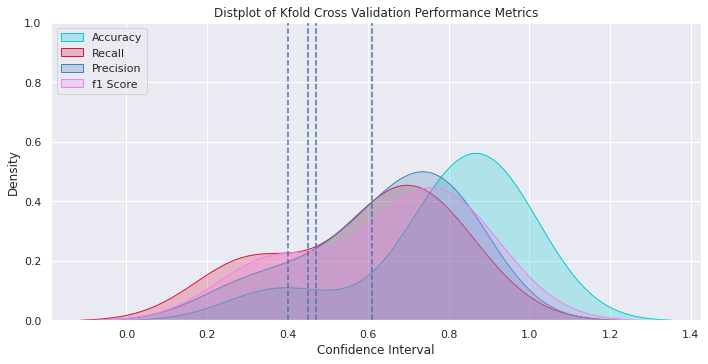

In [514]:
mypal=('#4682B4','#DC143C','#EE82EE','#00CED1')
graph = sns.displot(stack_df, x='score', hue='metric', kind="kde", fill=True,height=5,aspect=2,legend=False,palette=mypal1)
plt.title('Distplot of Kfold Cross Validation Performance Metrics')
plt.ylim(0,1)
plt.xlabel('Confidence Interval')
graph.ax.legend(labels=['Accuracy','Recall','Precision','f1 Score'],loc=2)
for CI in CI_df['CI'].values:
    plt.axvline(CI[0],  linestyle='--')
plt.show()

In [515]:
from scipy.stats import shapiro
for col, val in df.iteritems():
    print(col)
    stat, p = shapiro(val)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

ADA
Statistics=0.744, p=0.034
RFC
Statistics=0.907, p=0.468
NB
Statistics=0.928, p=0.584
NNMLP
Statistics=0.795, p=0.094
SVC
Statistics=0.873, p=0.310
CNN
Statistics=0.880, p=0.339
LSTM
Statistics=0.791, p=0.087


In [516]:
stats.levene(*[df_cv[i] for i in df_cv.columns])

LeveneResult(statistic=0.05060866565078645, pvalue=0.984584819479392)

In [517]:
df=df_cv.transpose()

In [518]:
import scipy.stats as stats
F, p = stats.f_oneway(*[df[i] for i in df.columns])
print(f'F= {F}, p={p}')

F= 9.970816688955104, p=2.9906511116184293e-05


In [519]:
# ANOVA the hard way
# n1 = n2 = n3 
k = len(df.iloc[0]) # Number of columns
list_n = df.count().values
n = np.sum(df.count().values) # Total number of observations

# sum all value from all groups and divide it by sum of observation from all (the three) samples
CM = (df.sum().sum())**2 / n 
# print('CM', CM)
# total SS 
TSS = (df**2).sum().sum() - CM
dof_tss = n - 1

# SST between
SST = ((df.sum()**2).values / list_n).sum() - CM
dof_sst = k - 1
MST = SST / dof_sst 
# SSE within
SSE = TSS - SST
dof_mse = n - k
MSE = SSE / dof_mse

# Test statistic
F = MST/ MSE
# p-value
p = stats.f.sf(F, dof_sst, dof_mse)

# Eta 
et_sq = SST / TSS
# Omega squared 
om_sq = SST - (dof_sst * MSE) / (TSS + MSE)

print('SST', SST, 'dof', dof_sst,'MST', MST)
print('SSE', SSE, 'dof', dof_mse,'MSE', MSE)
print('TSS', TSS, 'dof', dof_tss, 'F', F)
print('p value', p)
print('eta squared', et_sq, 'omega_sqaured', om_sq)

SST 0.824941928571425 dof 6 MST 0.13749032142857084
SSE 0.2895747499999999 dof 21 MSE 0.013789273809523803
TSS 1.114516678571425 dof 27 F 9.97081668895506
p value 2.990651111618524e-05
eta squared 0.740179078906945 omega_sqaured 0.7516146163450256


In [520]:
# CHECK THE RESULTS of DF in analys variance table.
# F stat and pvalue from statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Reform the dataframe 
stack_df = df.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'id',
                                    'level_1': 'metric',
                                    0:'score'})
# print(df_2)

mod = ols('score ~ metric', data=stack_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

# et_sq = SST / TSS
et_sq = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('et_sq', et_sq)

            sum_sq    df         F   PR(>F)
metric    0.824942   6.0  9.970817  0.00003
Residual  0.289575  21.0       NaN      NaN
et_sq 0.740179078906946


In [521]:
# Tukey multi comparison method
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stack_df['score'],
                            stack_df['metric'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   ADA    CNN   0.4242  0.001  0.1543  0.6942   True
   ADA   LSTM   0.2822 0.0366  0.0123  0.5522   True
   ADA     NB  -0.0553    0.9 -0.3252  0.2147  False
   ADA  NNMLP   0.2783 0.0406  0.0083  0.5482   True
   ADA    RFC   0.3085 0.0185  0.0386  0.5784   True
   ADA    SVC   0.3818 0.0025  0.1118  0.6517   True
   CNN   LSTM   -0.142 0.6037 -0.4119  0.1279  False
   CNN     NB  -0.4795  0.001 -0.7494 -0.2096   True
   CNN  NNMLP   -0.146 0.5777 -0.4159  0.1239  False
   CNN    RFC  -0.1158 0.7744 -0.3857  0.1542  False
   CNN    SVC  -0.0425    0.9 -0.3124  0.2274  False
  LSTM     NB  -0.3375 0.0085 -0.6074 -0.0676   True
  LSTM  NNMLP   -0.004    0.9 -0.2739  0.2659  False
  LSTM    RFC   0.0262    0.9 -0.2437  0.2962  False
  LSTM    SVC   0.0995 0.8801 -0.1704  0.3694  False
    NB  NNMLP   0.3335 0.0095  0.0636  0.6034 